# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

## **Project Overview**
This notebook explores customer segmentation for a retail bank using multiple clustering techniques.
The goal is to identify distinct customer groups based on credit characteristics and channel usage,
and translate these insights into actionable business recommendations.


--------------------------------
## **Context**
-------------------------------

**AllLife Bank aims to improve the performance of its credit card business by better understanding customer behavior. The marketing team is interested in running more personalized campaigns to increase customer engagement and improve market penetration. At the same time, internal insights suggest that customers are dissatisfied with support services, particularly in terms of response time and service efficiency.
To address both challenges, the project aims to analyze customer behavior and interaction patterns in order to support targeted marketing strategies and service model improvements.

----------------------------
## **Objective**
-----------------------------

The objective of this analysis is to segment existing credit card customers into distinct group and use them to support personalized marketing efforts and operational decision-making.

--------------------------
## **Feature description**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

### **Data Overview**

### **Loading the data**

NOTE: The raw dataset is not included in this repository because it is part of an MIT-affiliated course

In [ ]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [ ]:
# Creating a copy of the dataset
df = data.copy()

In [ ]:
# Checking the first 5 rows
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
# Cheching the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


The following data set contains 660 rows and 7 columns. All columns are integers, and there are no missing values. However, the columns like “Sl_No” and “Customer_Key” are most likely irrelevant for our data and may create additional noise in our analysis. Therefore, we will check whether the values in these columns are unique, and if so, we will drop them, since they do not contribute useful information and may reduce the quality of the analysis.

In [ ]:
# Checking the number of unique values
df["Sl_No"].nunique()

660

In [ ]:
# Checking the number of unique values
df["Customer Key"].nunique()

655

In [ ]:
duplicates = df["Customer Key"].duplicated()

In [ ]:
df[duplicates]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


There are 660 unique values in the “Sl_No” column and 655 in the “Customer_Key” column. This means that most "Customer Key" values are unique, with only a few duplicates. Since “Customer Key” is an identifier and does not contain any behavioral information, the duplicated keys do not add analytical value.

In [ ]:
df.drop_duplicates(subset="Customer Key", keep="first")

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


After identifying the 5 repeated customer keys, we removed these duplicate rows to ensure that each customer appears only once in the dataset. With the duplicates removed, we can now safely drop both identifier columns before proceeding with the analysis.

In [ ]:
df.drop(["Sl_No", "Customer Key"], axis=1, inplace=True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [ ]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


The descriptive statistics show that the average credit limit is 34,574, with customers having around 4 credit cards in total. The data indicates that users do not engage in frequent communication with the bank, with both in-person and online visits averaging around 2. However, the maximum number of online visits reaches 15, compared to a maximum of 5 in-person visits, suggesting that customers tend to rely more on online channels when they do interact with the bank. Overall, this implies a preference for online banking, even though the average number of visits remains low in both categories.

## **Data Preprocessing and Exploratory Data Analysis**

**Univariate Analysis**

In [ ]:
def hist_boxplot(data, column_name, figsize=(12,7), bins=None):

  fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=figsize)

  sns.boxplot(data=data, x=column_name, ax=ax_box, showmeans=True)

  if bins == None:
    sns.histplot(data=data, x=column_name, kde=True, ax=ax_hist)
  else:
    sns.histplot(data=data, x=column_name, ax=ax_hist, kde=True, bins=bins)

  ax_hist.axvline(x=data[column_name].mean(), color="black", linestyle="--")
  ax_hist.axvline(x=data[column_name].median(), color="red", linestyle="-")

  plt.tight_layout()
  plt.show()

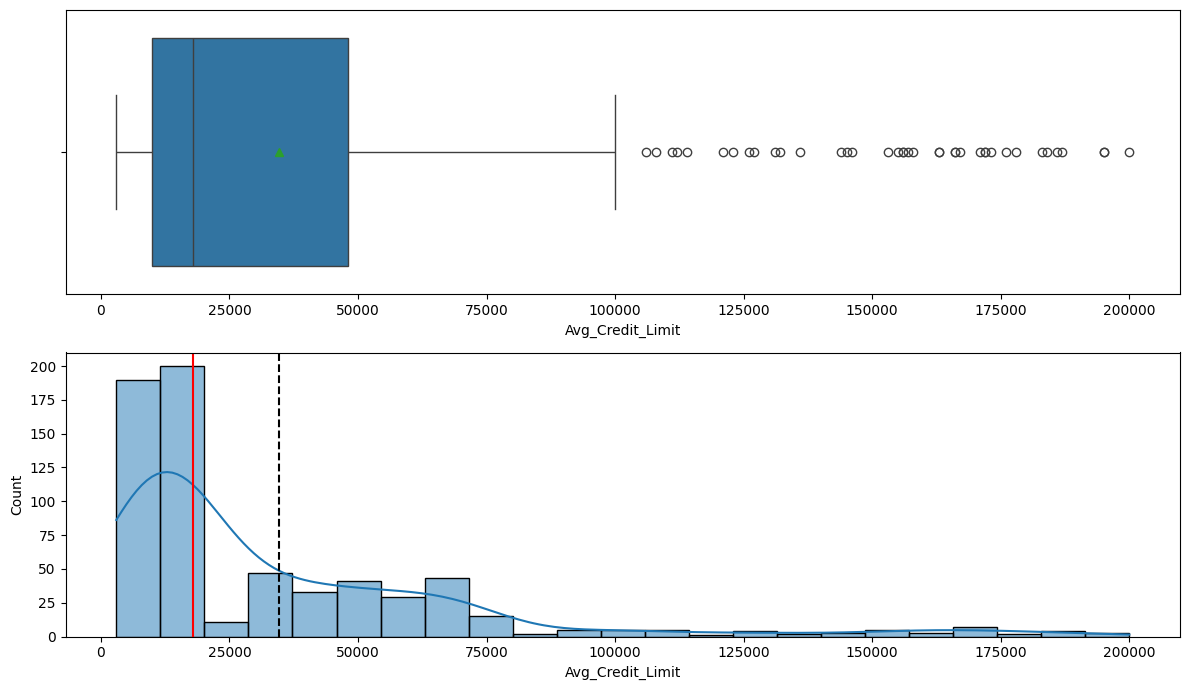

In [ ]:
hist_boxplot(data=df, column_name="Avg_Credit_Limit")

The graphs show that the distribution of "Avg_Credit_Limit" is strongly right-skewed. Most customers fall in the credit-limit range of 5,000-30,000. The median credit limit is around 20,000, while the mean is higher,around 33,000, which indicates that a smaller group of customers with very high credit limits is pulling the average upward. The boxplot also shows multiple high-end outliers above 100,000, suggesting a segment of high-credit customers.

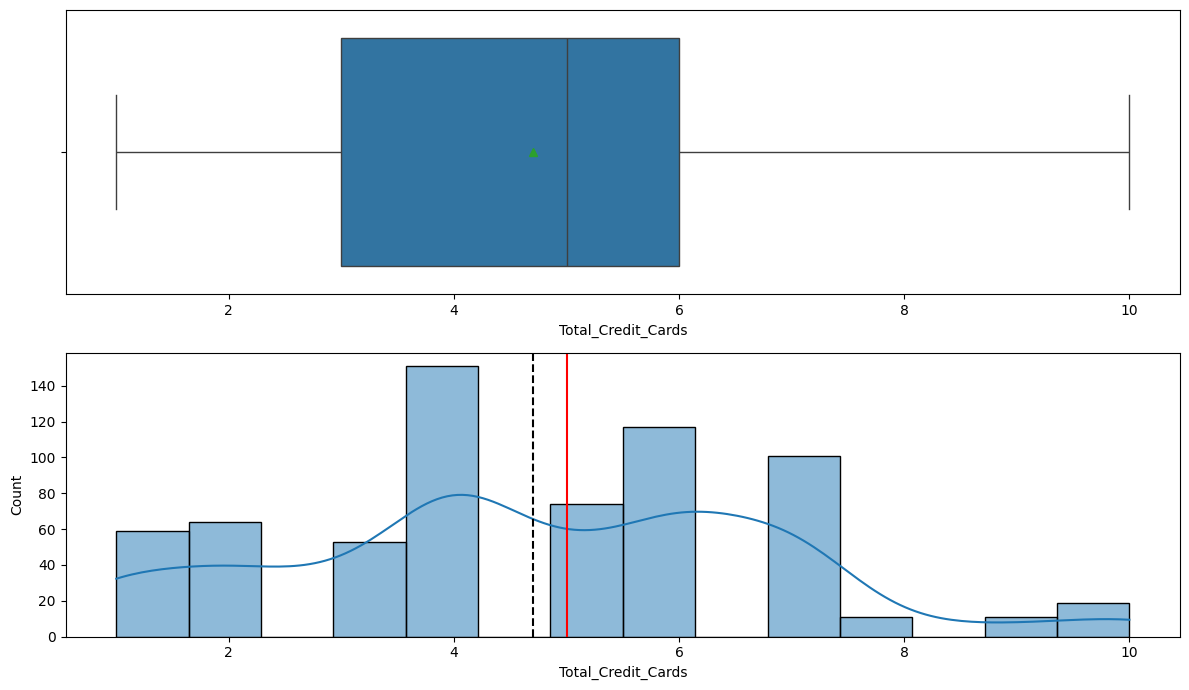

In [ ]:
hist_boxplot(df, "Total_Credit_Cards")

From the graphs, the average and median number of credit cards per customer are very close, both around 5, indicating that the distribution is not strongly skewed. The boxplot shows no significant outliers, and the histogram reveals a distribution with several peaks, suggesting that customers tend to group into segments based on how many credit cards they hold (3-4 cards, 5-6 cards, etc.)

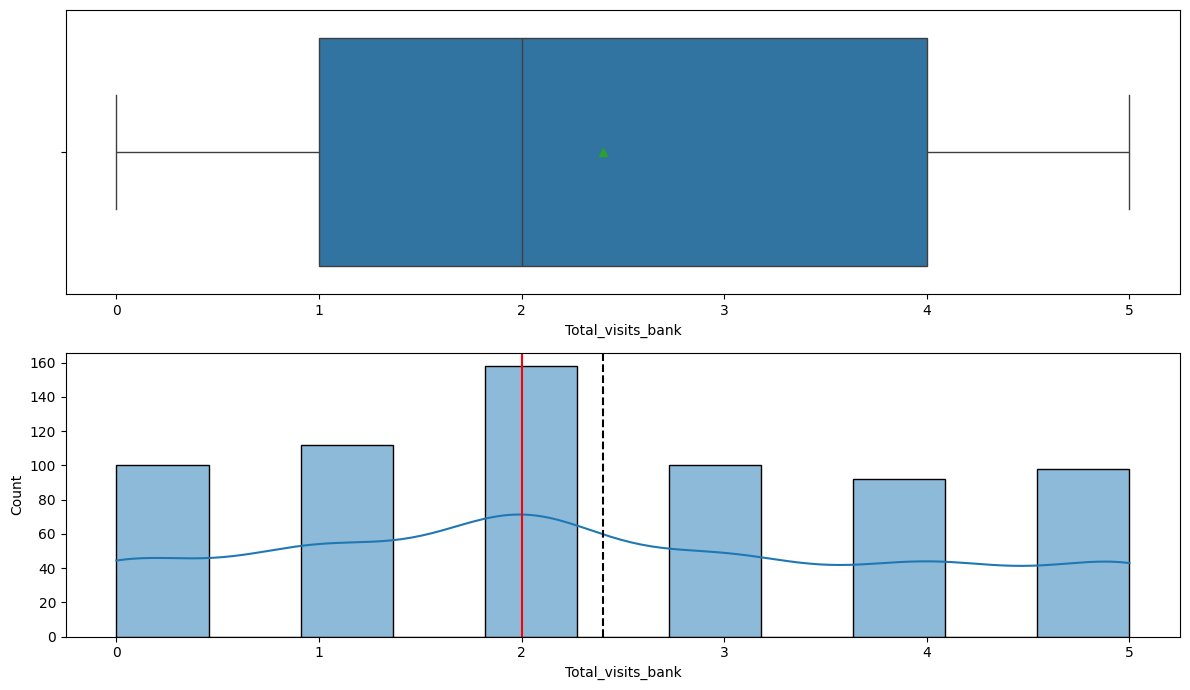

In [ ]:
hist_boxplot(df, "Total_visits_bank")

These plots show that customers most commonly make around 2-3 in-person bank visits, with a clear concentration at 2 visits. At the same time, the distribution from 0 to 5 visits is fairly balanced, as each category has a similar number of customers (around 90-120 per group). This indicates that while 2 visits is the most typical, customers vary widely in how often they visit the bank in person.

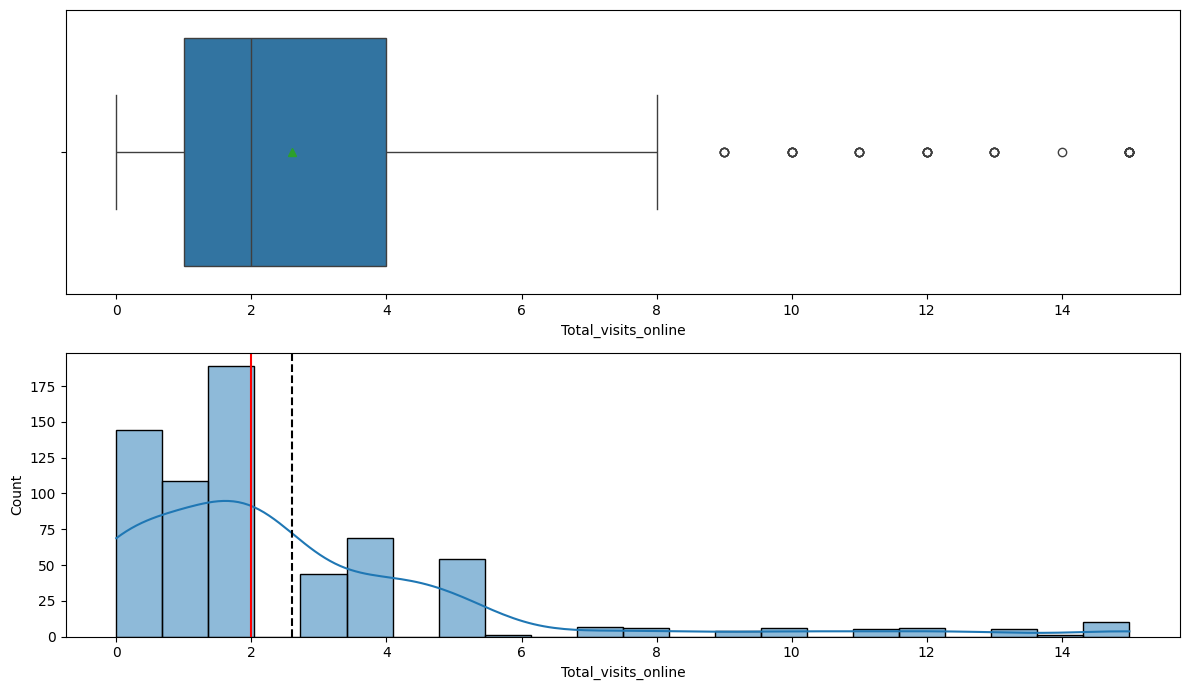

In [ ]:
hist_boxplot(df, "Total_visits_online")

The plots show that most customers make between 1 and 3 online banking visits, with the highest concentration around 1-2 visits. The distribution is clearly right-skewed, as a small segment of customers engages with online banking much more frequently. These users make between 9 and 14 online visits, appearing as outliers in the boxplot. This suggests that while typical customers use online services only a few times, there is a noticeable minority with significantly higher online engagement.

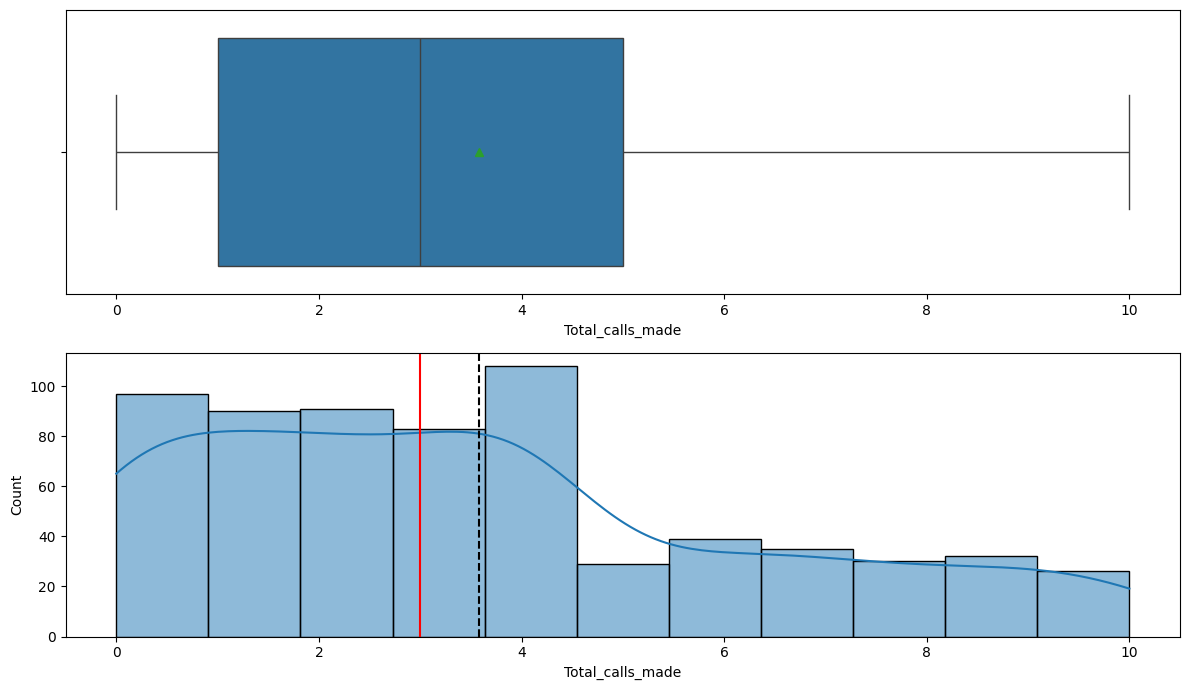

In [ ]:
hist_boxplot(df, "Total_calls_made")

The histogram shows that 4 calls is the most frequent value among customers, with the highest bar in the distribution. Calls ranging from 0 to 3 are also common, but each appears slightly less frequently than 4 calls. The distribution is right-skewed, as the number of customers declines from 5 to 10 calls. The boxplot confirms that these higher call counts are not outliers, meaning such call volumes occur regularly enough to be considered normal behavior.

**Bivariate Analysis**

Since we do not have target or predictor variables in this dataset, our bivariate analysis will focus on comparing different columns with each other to understand how the variables relate and how they correlate overall.

In [ ]:
def scatterplot(data, x_column, y_column, figsize=(12,7)):

  plt.figure(figsize=figsize)

  sns.scatterplot(data=data, x=x_column, y=y_column, color="navy", alpha=0.5)

  plt.xlabel(x_column)
  plt.ylabel(y_column)

  plt.show()

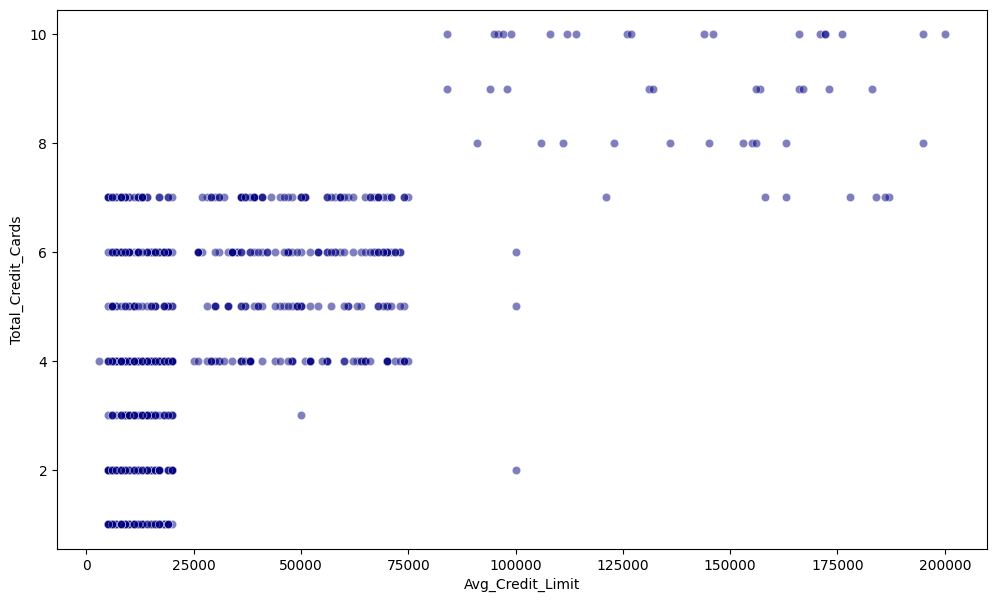

In [ ]:
scatterplot(df, "Avg_Credit_Limit", "Total_Credit_Cards")

The scatterplot suggests the presence of three customer groups:
- the first group includes customers with credit limits between 0 and 25k, who typically hold between 1 and 7 credit cards.
- the second, mid-range group has credit limits between 25k and 75k, and these customers usually carry around 3 to 7 cards.
- a smaller third group appears at credit limits above 100k. These customers tend to have higher numbers of cards(between 7 and 10).
The plot suggests that as the credit limit increases, customers are more likely to possess more credit cards.

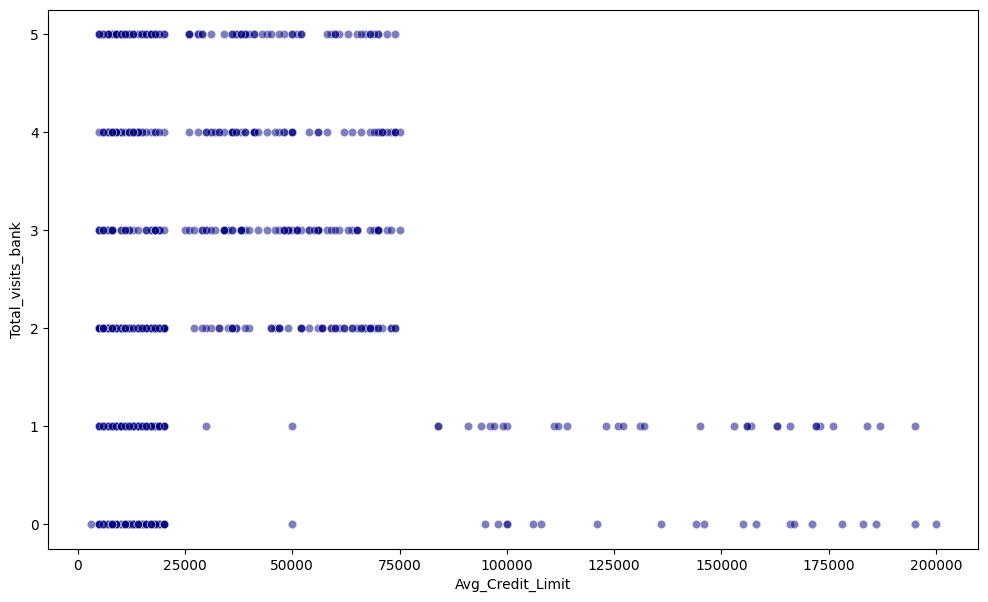

In [ ]:
scatterplot(df, "Avg_Credit_Limit", "Total_visits_bank")

The scatterplot again separates customers into three credit limit groups. Customers with lower and mid credit limits (up to around 75k) tend to visit bank branches more frequently, with most of them making between 2 and 5 visits. In contrast, customers with high credit limits (above 100k) rarely visit the bank in person and typically show 0 or 1 visit. This suggests that higher-credit customers rely less on branch interactions compared with lower-credit customers.

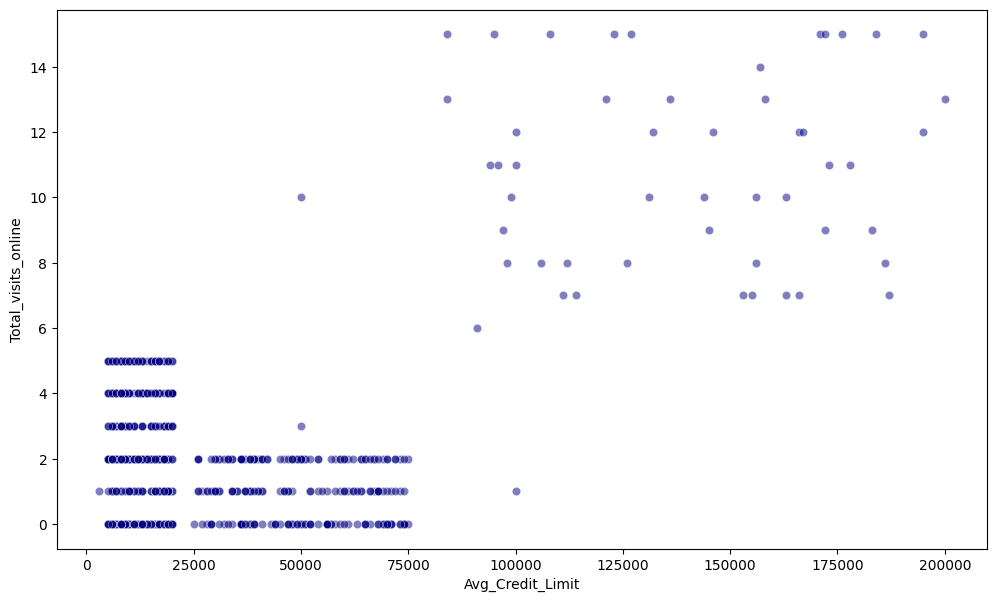

In [ ]:
scatterplot(df, "Avg_Credit_Limit", "Total_visits_online")

The scatterplot again reveals three customer segments based on credit limits. Customers with lower credit limits (up to 25k) mostly use online banking only occasionally, typically between 0 and 5 visits. Mid-range customers (25k-75k) show a similar pattern, but clustering even lower (around 0-2 visits). In contrast, high-credit customers (above 100k) display a distinct behavior: they use online banking much more frequently, with most of their activity concentrated between 7 and 14 visits. Although this high-limit segment is relatively small, online platforms appear to be their main channel of engagement with the bank.

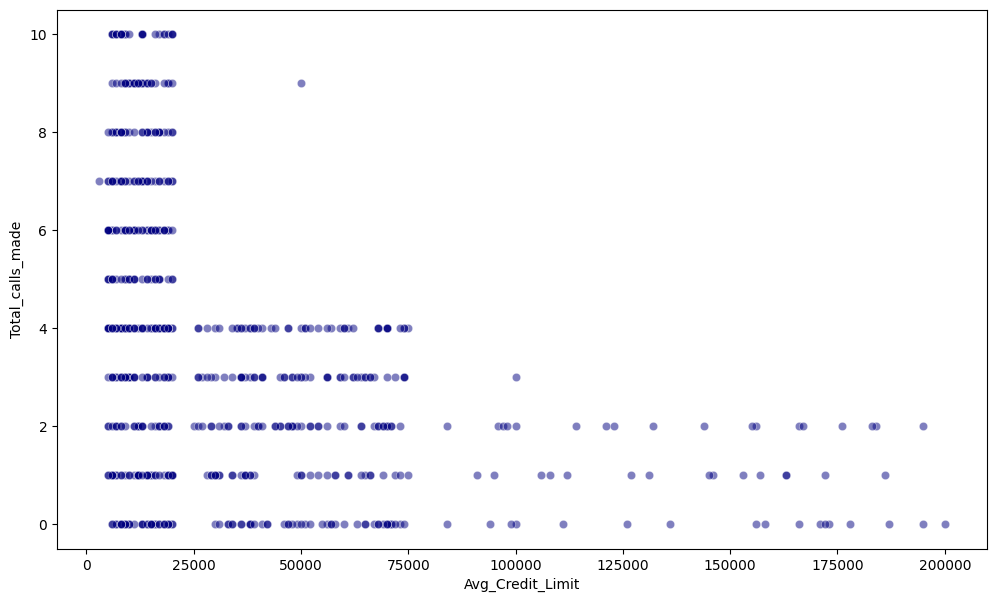

In [ ]:
scatterplot(df, "Avg_Credit_Limit", "Total_calls_made")

The scatterplot shows that customers in the low credit segment make significantly more calls than both mid and high credit customers. Low limit customers frequently appear across the full call range, including many observations between 0 and 10 calls. Mid-range customers call less often, mostly staying within 0-4 calls. High-credit customers show the lowest call activity, with the majority making only 0 or 2 calls. As we can see, call frequency decreases as the customer's credit limit increases.

In [ ]:
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


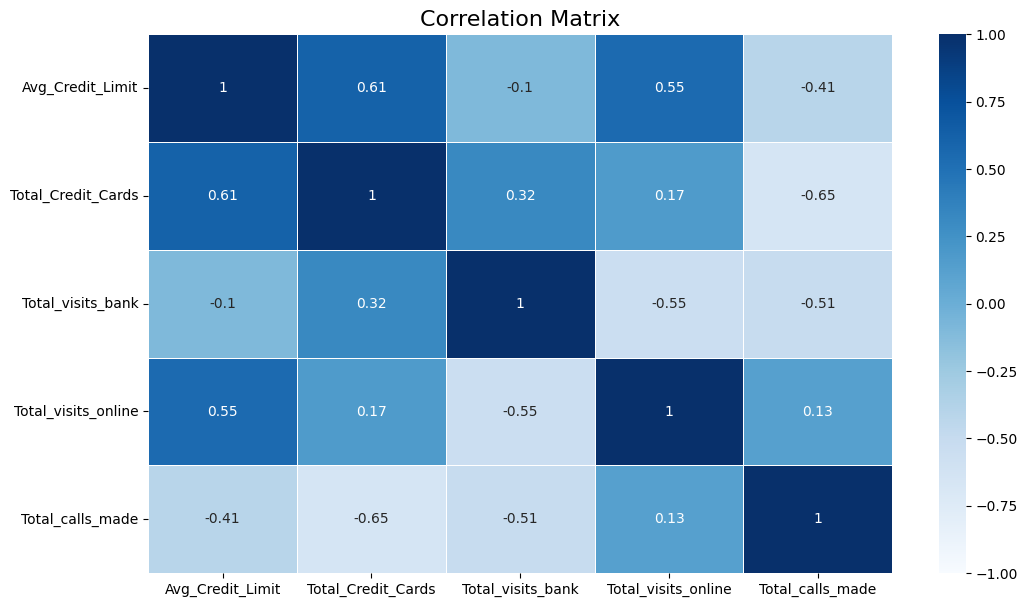

In [ ]:
# creating a correlation plot
plt.figure(figsize=(12,7))

sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap="Blues",
            linewidths=0.5)

plt.title("Correlation Matrix", fontsize=16)
plt.show()

The strongest positive correlation in the dataset is between "Avg_Credit_Limit" and "Total_Credit_Cards" (approximatly 61%).This supports our earlier observations: customers with higher average credit limits tend to own more credit cards. This relationship is expected, because banks typically assign higher limits to customers who have multiple active credit lines and strong creditworthiness.

#### **Scaling the data**

Before applying clustering and dimensionality reduction techniques, the numerical features are scaled to ensure that all variables contribute equally to the analysis. This step is important because features such as credit limit and visit counts are measured on very different scales, and distance-based methods are sensitive to these differences.

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## **Principal Components Analysis**

The PCA will be applied to the scaled data to reduce dimensionality while retaining most of the underlying variance in the dataset. This helps simplify the data structure, reduce noise, and improve the effectiveness and interpretability of the clustering results.

In [ ]:
pca=PCA(n_components=5, random_state=1)

In [ ]:
pca_components = pca.fit_transform(df_scaled)

In [ ]:
pca_df = pd.DataFrame(pca_components,
    columns=[f"PC{i+1}" for i in range(pca_components.shape[1])])

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,0.501291,0.524829,-1.895862,-1.200582,1.277831
1,-1.459560,3.105588,0.906802,-0.411052,-0.355547
2,0.525795,0.823979,-0.089030,1.033119,0.196693
3,-0.362294,0.128123,-0.558215,0.729885,0.320163
4,1.266228,3.668708,0.099999,-0.505571,-0.724437
...,...,...,...,...,...
655,3.038539,2.666249,0.092289,0.568711,-0.946140
656,2.567247,3.341750,0.873793,0.530812,-1.580469
657,2.851444,2.983081,-0.044888,-0.302533,0.347817
658,4.178258,4.582930,0.605336,-0.573188,-0.578235


In [ ]:
# Checking explained variance
explained_var = pca.explained_variance_ratio_
explained_var

array([0.45736578, 0.37426483, 0.06401348, 0.0555688 , 0.04878711])

The PCA results show that the first two principal components capture the majority of the information in the dataset, explaining approximately 82% of the total variance (PC1 = 0.45 and PC2 = 0.37). This indicates that most customer behavior patterns can be effectively represented in a two-dimensional space.

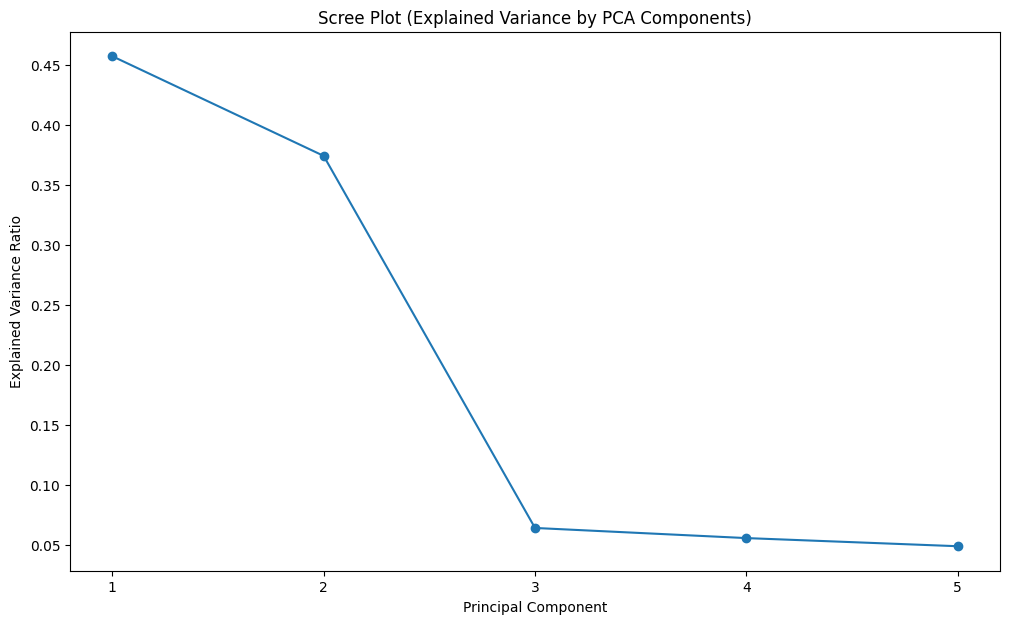

In [ ]:
# creating a pca plot
plt.figure(figsize=(12,7))
plt.plot(range(1, len(explained_var) +1), explained_var, marker="o")
plt.title("Scree Plot (Explained Variance by PCA Components)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_var) + 1))
plt.show()

From the plot, it is clear that most of the meaningful variation is captured by the first two components, after which the improvements become very small. This suggests that additional components add little value and may complicate the analysis without providing clearer insights. Therefore, using two components offers a good balance between simplicity and information retention.

In [ ]:
# creating a df copy for further analysis
pca_df_copy = pca_df.copy(deep=True)

## **K-Means**

With the data now represented in a lower-dimensional space, we apply K-Means clustering to identify natural groupings among customers and determine an appropriate number of clusters.

In [ ]:
# creating a new data set containing only the first 2 PCs

pc2_df = pca_df[["PC1", "PC2"]].copy()

In [ ]:
pc2_df

,PC1,PC2
0,0.501291,0.524829
1,-1.459560,3.105588
2,0.525795,0.823979
3,-0.362294,0.128123
4,1.266228,3.668708
...,...,...
655,3.038539,2.666249
656,2.567247,3.341750
657,2.851444,2.983081
658,4.178258,4.582930


In [ ]:
# creating a list of WCSS values
wcss = []

for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(pc2_df)
  wcss.append(kmeans.inertia_)

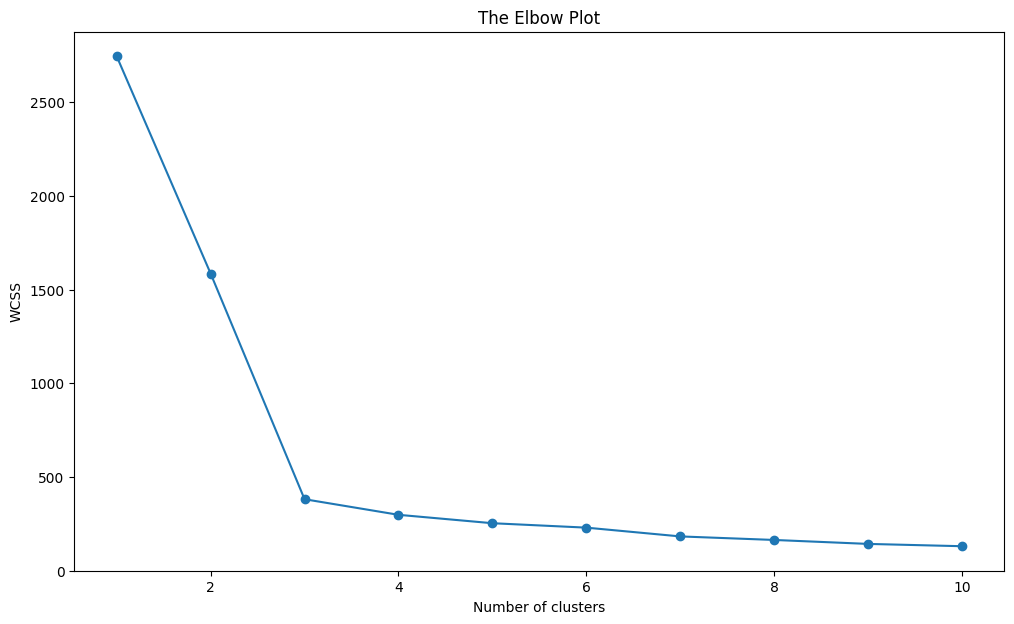

In [ ]:
# creating K-Means plot

plt.figure(figsize=(12,7))

plt.plot(range(1,11), wcss, marker="o")
plt.title("The Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

The elbow plot shows a sharp drop in WCSS as the number of clusters increases from 1 to 3. After that point, the improvement becomes much smaller, and the curve starts to level off. This suggests that using three clusters captures most of the meaningful structure in the data without adding unnecessary complexity.

In [ ]:
# fitting K=Means with the chosen # of clusters

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pc2_df)

labels = kmeans.labels_

df["KMeansLabels"] = labels

In [ ]:
print(pc2_df, df)

          PC1       PC2
0    0.501291  0.524829
1   -1.459560  3.105588
2    0.525795  0.823979
3   -0.362294  0.128123
4    1.266228  3.668708
..        ...       ...
655  3.038539  2.666249
656  2.567247  3.341750
657  2.851444  2.983081
658  4.178258  4.582930
659  3.160426  4.351019

[660 rows x 2 columns]      Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10       

After applying K-Means with 3 clusters, each data point was assigned a cluster label based on its position in the first two principal components. The labels were added to both the PCA dataset and the original dataset, allowing us to visualize the clusters and analyze how customer characteristics differ across the three groups. The dataset is now ready for cluster profiling.

#### **Creating the cluster profiles using the summary statistics and box plots for each label**

In [ ]:
# counting the number of customers per each cluster
df["KMeansLabels"].value_counts()

,count
KMeansLabels,
0,386
2,224
1,50


In [ ]:
df.groupby("KMeansLabels").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KMeansLabels,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


In [ ]:
df.groupby("KMeansLabels").median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
KMeansLabels,,,,,
0,31000.0,6.0,3.0,1.0,2.0
1,145500.0,9.0,1.0,11.0,1.0
2,12000.0,2.0,1.0,4.0,7.0


**Cluster Profiles**

Cluster 0: Mid-value customers
Customers in this group have moderate credit limits and hold a medium number of credit cards. They interact with the bank through a combination of branch visits and limited online activity, suggesting that these customers use different channels depending on the situation rather than favoring digital platforms.

Cluster 1: High-value customers
This cluster includes customers with very high credit limits and the largest number of credit cards. They show strong online engagement, minimal branch visits, and very few support calls. These customers are digitally confident, high-value clients and are likely well-suited for premium products, personalized offers, and self-service digital experiences.

Cluster 2: Low-value customers
Customers in this segment have lower credit limits and hold fewer credit cards. They exhibit relatively higher reliance on customer support while showing limited online and branch engagement. This group appears more service-dependent and may benefit from improved support processes, education on digital channels, or simplified products.

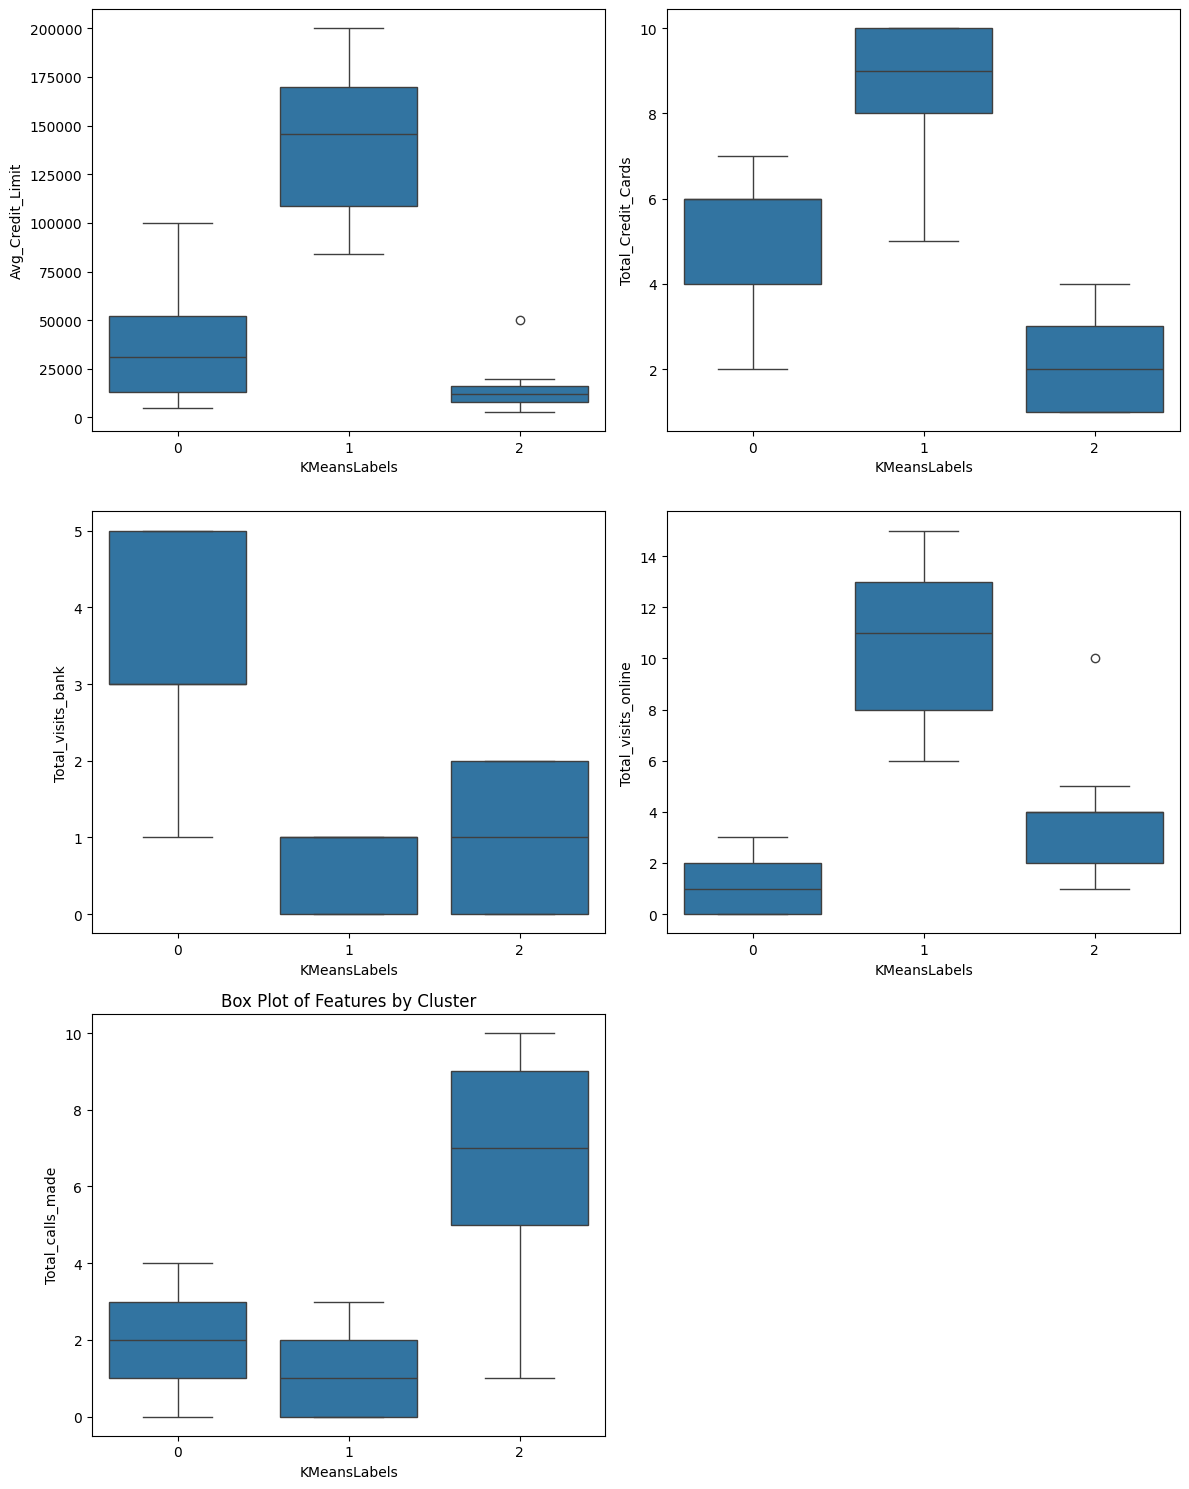

In [ ]:
# Creating a plot for each feature by cluster

features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank",
            "Total_visits_online", "Total_calls_made"]
plt.figure(figsize=(12, 15))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x="KMeansLabels", y=feature)

plt.title("Box Plot of Features by Cluster")
plt.tight_layout()
plt.show()

The boxplots show that Cluster 1 exhibits the highest values and the widest spread in credit limits and online activity, indicating a group of high-value customers with varying levels of engagement.

Cluster 2 has lower credit limits and tighter distributions, along with consistently higher call activity, confirming it as a more service-dependent, lower-value group.

Cluster 0 displays moderate values across features, with some variation in branch visits, suggesting a more mixed engagement pattern with in-person interactions playing a role.

Overall, the boxplots show that the K-Means segmentation separates the groups clearly across key behavioral and value-related features.

## **Gaussian Mixture Model**

To further explore customer segmentation, a Gaussian Mixture Model is applied to the PCA transformed data. Unlike K-Means, GMM allows for more flexible cluster shapes and provides an alternative view of how customers may group together based on underlying patterns.

In [ ]:
# Implimenting GMM algorithm
gmm = GaussianMixture(n_components=3, random_state=1)
gmm.fit(pc2_df)

gmm_labels= gmm.predict(pc2_df)

df["GmmLabels"] = gmm_labels

#### **Creating the cluster profiles using the summary statistics and box plots for each label**


In [ ]:
df["GmmLabels"].value_counts()

,count
GmmLabels,
0,386
2,224
1,50


In [ ]:
df.groupby("GmmLabels").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeansLabels
GmmLabels,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,0.0
1,141040.000000,8.740000,0.600000,10.900000,1.080000,1.0
2,12174.107143,2.410714,0.933036,3.553571,6.870536,2.0


In [ ]:
df.groupby("GmmLabels").median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeansLabels
GmmLabels,,,,,,
0,31000.0,6.0,3.0,1.0,2.0,0.0
1,145500.0,9.0,1.0,11.0,1.0,1.0
2,12000.0,2.0,1.0,4.0,7.0,2.0


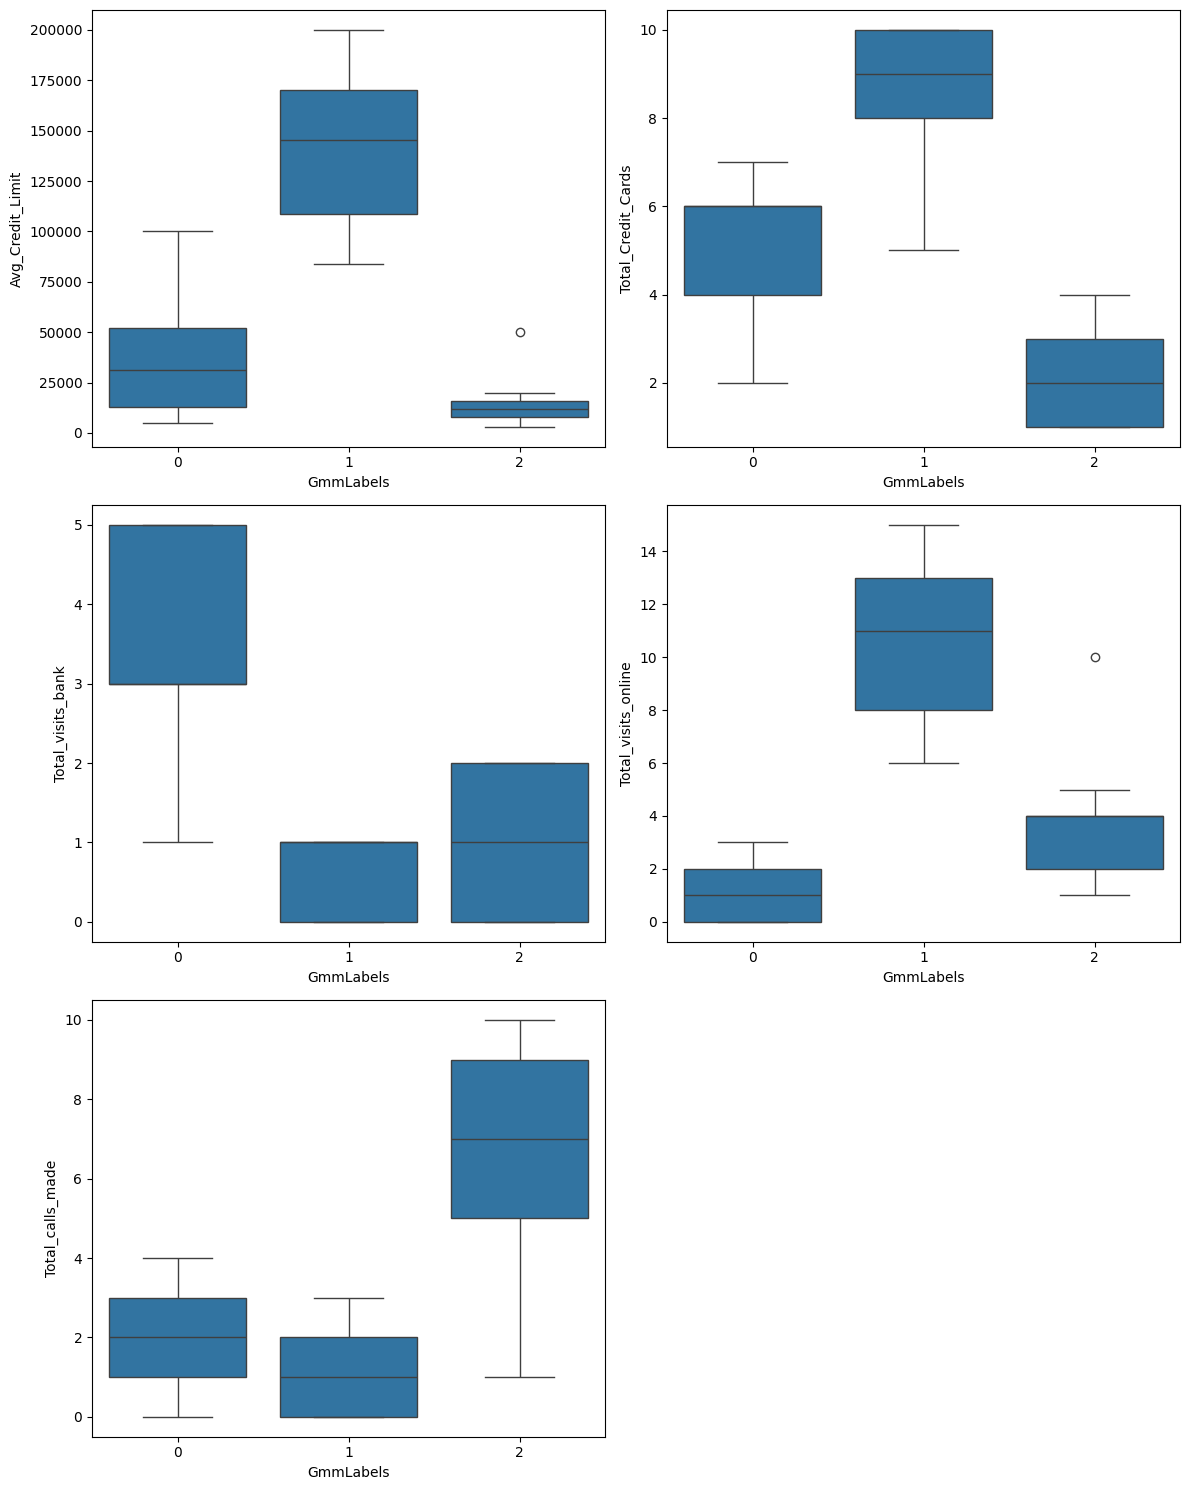

In [ ]:
# Creating a boxplot for GMM

features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank",
            "Total_visits_online", "Total_calls_made"]

plt.figure(figsize=(12, 15))

for i, feature in enumerate(features, 1):
  plt.subplot(3, 2, i)

  sns.boxplot(data=df, x="GmmLabels", y=feature)

plt.tight_layout()
plt.show()

Cluster 1 represents high-value customers with the highest credit limits and the largest number of credit cards. They are highly engaged online and make minimal use of branch visits or call-based support.

Cluster 2 consists of customers with the lowest credit limits and fewest credit cards. This group shows the highest call activity and moderate branch visits, indicating a stronger reliance on customer support services.

Cluster 0 includes customers with mid-range credit limits and a moderate number of credit cards. They show low online usage but the highest frequency of branch visits, suggesting a more traditional, in-person banking preference.

#### **Comparing the clusters from both algorithms - K-means and Gaussian Mixture Model**

The GMM box plots show a segmentation pattern that is very similar to the K-Means results. One cluster clearly represents high-value customers, with the highest credit limits and the most credit cards. Another cluster includes lower-value customers with the smallest credit limits and fewer cards, along with higher call volumes and some in-branch visits. The third cluster is in between, with moderate credit limits and a mix of online and offline engagement. Thus, the close similarity between the GMM and K-Means results suggests that the customer segments are clear and consistent, regardless of the clustering method used.

## **K-Medoids**

We now will apply another algorithm to the PCA data to identify customer segments - K-Medoids. Unlike K-Means, K-Medoids forms clusters around actual data points, making it less sensitive to extreme values and outliers. This helps us check whether the customer segments remain consistent when a more robust clustering approach is used.

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=1)
kmedoids.fit(pc2_df)

kmedoids_labels = kmedoids.predict(pc2_df)

df["KMedoidsLabels"] = kmedoids_labels

#### **Creating cluster profiles using the summary statistics and box plots for each label**

In [ ]:
df["KMedoidsLabels"].value_counts()

,count
KMedoidsLabels,
0,299
2,221
1,140


In [ ]:
df.groupby("KMedoidsLabels").mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeansLabels,GmmLabels
KMedoidsLabels,,,,,,,
0,27408.026756,5.468227,3.816054,0.906355,1.919732,0.006689,0.006689
1,85278.571429,6.735714,1.728571,4.728571,1.885714,0.385714,0.385714
2,12149.321267,2.389140,0.918552,3.561086,6.909502,2.000000,2.000000


In [ ]:
df.groupby("KMedoidsLabels").median()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeansLabels,GmmLabels
KMedoidsLabels,,,,,,,
0,19000.0,6.0,4.0,1.0,2.0,0.0,0.0
1,68000.0,7.0,2.0,2.0,2.0,0.0,0.0
2,12000.0,2.0,1.0,4.0,7.0,2.0,2.0


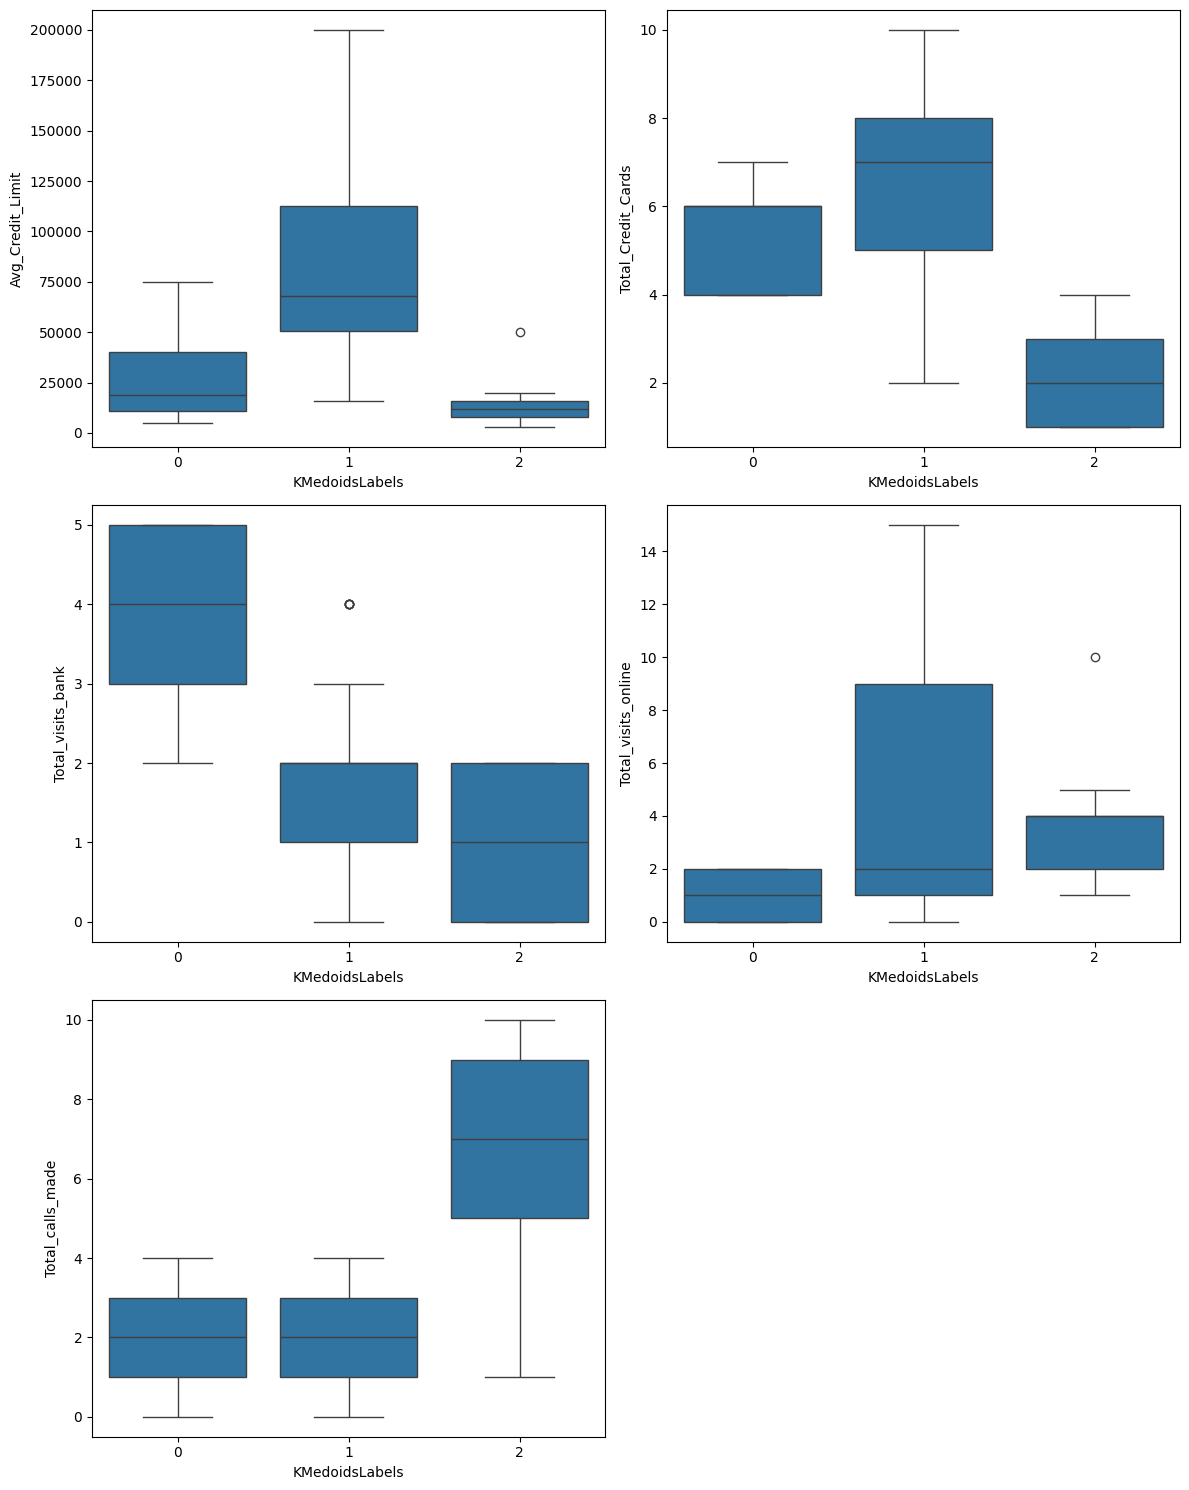

In [ ]:
features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank",
            "Total_visits_online", "Total_calls_made"]

plt.figure(figsize=(12, 15))

for i, feature in enumerate(features, 1):
  plt.subplot(3, 2, i)
  sns.boxplot(data=df, x="KMedoidsLabels", y=feature)

plt.tight_layout()
plt.show()

**Cluster Profiles**

K-Medoids forms clusters based on actual data points, so the groups are more stable and less influenced by outliers. From the boxplots, the patterns are:

Cluster 1: highest credit limits and most credit cards, online activity varies the most, with a few strong online-visit outliers.

Cluster 0: moderate credit limits. This group shows the highest branch visits.

Cluster 2: lowest credit limits. Generally low usage of all channels, but includes a few customers with unusually high online visits or calls.

#### **Comparing the clusters from K-Means and K-Medoids**

In [ ]:
comparison_df = df.drop("GmmLabels", axis=1)

comparison_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,KMeansLabels,KMedoidsLabels
0,100000,2,1,1,0,0,1
1,50000,3,0,10,9,2,2
2,50000,7,1,3,4,0,1
3,30000,5,1,1,4,0,1
4,100000,6,0,12,3,1,1
...,...,...,...,...,...,...,...
655,99000,10,1,10,0,1,1
656,84000,10,1,13,2,1,1
657,145000,8,1,9,1,1,1
658,172000,10,1,15,0,1,1


**Comparing Clusters**

In [ ]:
pd.crosstab(df["KMeansLabels"], df["KMedoidsLabels"])

KMedoidsLabels,0,1,2
KMeansLabels,,,
0,298,88,0
1,0,50,0
2,1,2,221


As we can see, class 0 has 298 customers in both KMeans and KMedoids, but 88 customers moved to group 1 according to the KMedoids analysis.
Cluster 1 looks very stable, as both algorithms identified 50 customers.
Cluster 2 also looks stable, as both algorithms found 221 customers who belong to class 2, and only 3 customers were assigned to clusters 0 and 1 in the KMedoids analysis.

KMedoids keeps the high-credit and low-credit groups almost identical to KMeans.
The differences come from KMedoids using actual data points as medoids, which makes it less sensitive to extreme values.

## **Conclusions and Business Recommendations**

**Conclusions**

All three algorithms KMeans, GMM, and KMedoids found very simillar structure in the data: one high-credit group, one mid-credit group, and one low-credit group. The main differences between the methods came from how borderline customers were assigned, but the core cluster patterns stayed the same.

KMeans gave the baseline segmentation. GMM assigns customers based on probabilities rather than fixed distances. However, in this dataset, the resulting clusters are very similar to those from K-Means, with the high-credit and low-credit groups remaining mostly unchanged. KMedoids produced results closest to KMeans, confirming that the clusters are stable even when using actual data points instead of centroids.

In conclusion, the customer segments are clear and consistent across all three methods. This means the clustering is reliable and can be used confidently for further interpretation and recommendations.

**Recommendations**

Since all three algorithms consistently separated customers into three clusters: low-credit, mid-range credit, and high-credit, we can conclude that each group has different banking preferences and behaviors.

For low-credit and mid-range clients, the analysis shows that they visit branches more often than high-credit customers. If this segment continues to grow, the bank may consider hiring more employees or optimizing in-branch operations to reduce wait times and improve customer experience. These two groups also make more phone calls, especially the mid-range segment, which suggests the need to expand the phone support system. This could include adding more automated options or enabling customers to resolve common account questions without waiting for a representative. Besides, since these customers rely more on branches and phone calls, the bank can send tutorials introducing mobile and online features. This reduces operational costs and improves efficiency.

High-credit customers, on the other hand, prefer online banking and interact less with branches or phone support. For this group, the bank may focus on improving digital features, prioritizing convenience and advanced tools. For example, customers with deposits above 100k could benefit from online investment options, financial planning tools, or access to advisors through secure chat.

The customer segments clear and consistent across all three methods. This indicates that the clustering captures meaningful and reliable differences in customer behavior and can be used confidently for further interpretation and business decision-making.